We're going to work with another of the examples from Chapter 3 of Chollet in this assignment.  Previously we used an example where the response was categorical with two categories; in this example, the response has 46 categories.

Our goal is to use the text of newswires (a very short summary of a news article) to classify them into one of 46 different topics.  The topics are things like 'cocoa', 'grain', 'earn', 'housing', 'money-supply', 'nat-gas', and so on.  In this data set, each newswire only belongs to one of these classes.

I have once again taken all of the code below to preprocess the data straight out of Chapter 3 of Chollet.  The book describes how the code works in some detail, so I encourage you to give it a read.

### Import modules

In [3]:
from keras import models
from keras import layers
from keras import optimizers
from keras.datasets import reuters
import matplotlib.pyplot as plt
from scipy.special import softmax
import numpy as np
import copy

Using TensorFlow backend.


### Load and preprocess the data

This will take a few seconds to run; it downloads a large data set.

The the newswires are one-hot encoded using the exact same representation as was used for the IMDB reviews.

In [4]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

2113536/2110848 [==============================] - 2s 1us/step


Let's look at one of the newswires to see what it looks like:

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])
print(decoded_newswire)

557056/550378 [==============================] - 1s 2us/step
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


### 1. Define a Keras model and fit it.

I'm making this an exercise to force you to get more practice with defining and fitting models in Keras, but note that the solution is in Chapter 3 of Chollet in case you get stuck...

Our model should have the following structure:

* Input layer has 10000 features (we kept the 10000 most commonly occuring words, and they are one-hot encoded).
* A fully connected (in other words, dense) hidden layer with 64 units and relu activation.
* A second fully connected (in other words, dense) hidden layer with 64 units and relu activation.
* A fully connected output layer with number of units equal to the number of classes for the response and a softmax activation.

Compile the model using `rmsprop` as the optimizer, 'categorical_crossentropy' as the loss, and ['accuracy'] as the only additional metric.

Fit the model using `partial_x_train` and `partial_y_train` as the training data, 20 epochs, a `batch_size` of 512, and `validation_data` given by `(x_val, y_val)`.  Save the model fit history in an object called `history` so that we can plot the training and validation set accuracy later.

In [6]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7982 samples, validate on 1000 samples
Epoch 1/20





7982/7982 [==============================] - 10s 1ms/step - loss: 2.7011 - acc: 0.5023 - val_loss: 1.8040 - val_acc: 0.6290
Epoch 2/20
7982/7982 [==============================] - 0s 57us/step - loss: 1.4649 - acc: 0.6964 - val_loss: 1.3439 - val_acc: 0.7160
Epoch 3/20
7982/7982 [==============================] - 0s 55us/step - loss: 1.0721 - acc: 0.7739 - val_loss: 1.1649 - val_acc: 0.7450
Epoch 4/20
7982/7982 [==============================] - 0s 57us/step - loss: 0.8333 - acc: 0.8250 - val_loss: 1.0513 - val_acc: 0.7720
Epoch 5/20
7982/7982 [==============================] - 0s 55us/step - loss: 0.6623 - acc: 0.8577 - val_loss: 0.9933 - val_acc: 0.7800
Epoch 6/20
7982/7982 [==============================] - 0s 55us/step - loss: 0.5237 - acc: 0.8914 - val_loss: 0.9229 - val_acc: 0.8080
Epoch 7/20
7982/7982 [=============

### Plot model estimation history

You don't have to do anything here other than run this code.

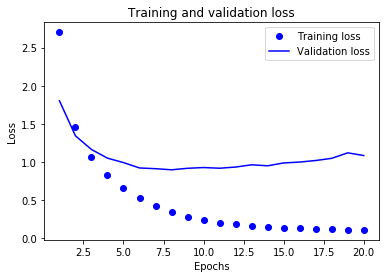

In [7]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

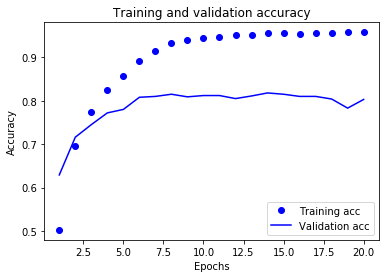

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 2. Explain how you can tell the model has overfit the training data from the plots of training and validation set performance above.

(add your answer here)

### Get test set performance

In [9]:
model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 90us/step


[1.2110338274751087, 0.7827248442204849]

For comparison, here's the accuracy of an approach that randomly shuffles the test set labels (basically, how well would we do if we just made predictions at random?)

In [10]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.1981300089047195

### Transpose/reshape data so that it's shaped the way our manual implementation expects.

In [0]:
partial_x_train = partial_x_train.T
partial_y_train = partial_y_train.T
x_val = x_val.T
y_val = y_val.T
x_test = x_test.T
y_test = one_hot_test_labels.T

In [12]:
print(partial_x_train.shape)
print(partial_y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(10000, 7982)
(46, 7982)
(10000, 1000)
(46, 1000)
(10000, 2246)
(46, 2246)


### Model in NumPy

Again, we're going to code this model up from scratch.  We will implement 5 functions:
1. `initialize_params` will generate random starting values for the parameters b and w.
2. `forward_prop` does the calculations for forward propagation.
3. `backward_prop` does the calculations for backward propagation.
4. `grad_check` does gradient checking so that we can be sure our backward propagation is correct.  I've written this one.
5. `fit_model` does gradient descent to estimate the model parameters.

Note that as defined above, our network has 3 layers (after the input layer):
 * Layer 1 has 64 units and a relu activation
 * Layer 2 has 64 units and a relu activation
 * Layer 3 has 46 unit and a softmax activation

### 1. initialize_params

Add the appropriate shape specifications to the initializations below.

**Note that you are defining $w$, not $w^T$**

In [0]:
def initialize_params(num_features, seed = 9433):
  '''
  Initialize parameter values for a network with 3 layers:
  layer 1 has 64 units, layer 2 has 64 units, and layer 3 has 46 units

  Arguments:
    - num_features: number of input features
    - seed: seed to use for random number generation
  
  Return:
    - Dictionary with initial values for b1, w1, b2, w2, b3, and w3
  '''
  # set seed
  np.random.seed(seed)

  # layer 1 parameters -- replace Nones with appropriate shape
  b1 = np.random.standard_normal((64, 1)) * 0.1 
  w1 = np.random.standard_normal((num_features, 64)) * 0.1

  # layer 2 parameters -- replace Nones with appropriate shape
  b2 = np.random.standard_normal((64, 1)) * 0.1
  w2 = np.random.standard_normal((64, 64)) * 0.1

  # layer 3 parameters -- replace Nones with appropriate shape
  b3 = np.random.standard_normal((46, 1)) * 0.1
  w3 = np.random.standard_normal((64, 46)) * 0.1

  return({
      'b1': b1,
      'w1': w1,
      'b2': b2,
      'w2': w2,
      'b3': b3,
      'w3': w3
  })

### 2. forward_prop

In [0]:
def forward_prop(params, x):
  '''
  Forward propagation calculations

  Arguments:
    - params: dictionary with values for b1, w1, b2, w2, b3, w3
    - x: matrix of features, shape (p, m)
  
  Return:
    - Dictionary with z and a values for each layer
  '''
  # Pull out parameters from params dictionary
  b1 = params['b1']
  w1 = params['w1']
  b2 = params['b2']
  w2 = params['w2']
  b3 = params['b3']
  w3 = params['w3']
  
  # Calculate forward propagation
  # You can use np.maximum(0, ___) to compute the relu activation function
  # We have imported the softmax function
  z1 = b1 + np.dot(w1.T, x)
  a1 = np.maximum(0, z1)

  z2 = b2 + np.dot(w2.T, a1)
  a2 = np.maximum(0, z2)

  z3 = b3 + np.dot(w3.T, a2)
  a3 = softmax(z3, axis = 0)
  
  # Return dictionary of results from forward propagation
  return({
    'z1': z1,
    'a1': a1,
    'z2': z2,
    'a2': a2,
    'z3': z3,
    'a3': a3
  })

### 3. backward_prop

In [0]:
def backward_prop(params, x, y, forward_cache):
  '''
  Backward propagation calculations

  Arguments:
    - params: dictionary with values for b1, w1, b2, w2, b3, w3
    - x: array of features, shape (p, m)
    - y: array of responses, shape (1, m)
    - forward_cache: Dictionary with z and a values for each layer
      (return value from forward_prop)
  
  Return:
    - Dictionary of derivatives of cost function J with respect to
      b1, w1, b2, w2, b3, w3
  '''
  # Extract quantities needed for backward propagation calculations
  m = x.shape[1]

  z1 = forward_cache['z1']
  a1 = forward_cache['a1']
  z2 = forward_cache['z2']
  a2 = forward_cache['a2']
  z3 = forward_cache['z3']
  a3 = forward_cache['a3']

  w1 = params['w1']
  w2 = params['w2']
  w3 = params['w3']

  # Backward propagation calculations
  # Layer 3
  dJdz3 = a3 - y
  dJdb3 = np.mean(dJdz3, axis = 1, keepdims=True)
  dJdw3 = (1/m) * np.dot(a2, dJdz3.T)

  # Layer 2
  dJda2 = np.dot(w3, dJdz3)
  dJdz2 = dJda2 * (z2 >= 0).astype(float)
  dJdb2 = np.mean(dJdz2, axis = 1, keepdims=True)
  dJdw2 = (1/m) * np.dot(a1, dJdz2.T)

  # Layer 1
  dJda1 = np.dot(w2, dJdz2)
  dJdz1 = dJda1 * (z1 >= 0).astype(float)
  dJdb1 = np.mean(dJdz1, axis = 1, keepdims=True)
  dJdw1 = (1/m) * np.dot(x, dJdz1.T)

  return({
      'dJdb1': dJdb1,
      'dJdw1': dJdw1,
      'dJdb2': dJdb2,
      'dJdw2': dJdw2,
      'dJdb3': dJdb3,
      'dJdw3': dJdw3
  })

### 4. grad_check
I have implemented this in the two functions below; you just need to run the code.  After the function definitions, there are calls to check the gradient for a bias parameter and a weight parameter in each of the 3 layers.  Your results should match to at least 6 or 7 decimal places.

Although I have implemented this, you should know how this works!

In [16]:
def loss(a3, y):
  '''
  Calculate the binary crossentropy loss

  Arguments:
    - a3: output from layer 3
    - y: observed responses
  
  Return:
    - binary cross entropy
  '''
  m = y.shape[1]
  result = 0
  for y_value in range(46):
    inds = np.where(y[y_value, :] == 1.)
    result += np.sum(np.log(a3[y_value, inds]))

  return(-1 * result / m)

def grad_check(param_name, ind1, ind2, eps = 0.000001):
  '''
  Calculate gradient check by finite differencing

  Arguments:
    - param_name: name of parameter to check, e.g. 'w1'
    - ind1, ind2: indices to check for the specified parameter
    - eps: amount to add and subtract from the given parameter value
  
  Returns:
    - No return value.  Prints diagnostic messages.
  '''
  params = initialize_params(num_features = partial_x_train.shape[0])
  forward_cache = forward_prop(params, partial_x_train)

  params[param_name][ind1, ind2] = params[param_name][ind1, ind2] + eps
  forward_cache_plus_eps = forward_prop(params, partial_x_train)
  loss_plus_eps = loss(forward_cache_plus_eps['a3'], partial_y_train)

  params[param_name][ind1, ind2] = params[param_name][ind1, ind2] - 2*eps
  forward_cache_minus_eps = forward_prop(params, partial_x_train)
  loss_minus_eps = loss(forward_cache_minus_eps['a3'], partial_y_train)

  est_grad = (loss_plus_eps - loss_minus_eps) / (2 * eps)
  calc_grad = backward_prop(params, partial_x_train, partial_y_train, forward_cache)

  print("\ncheck of dJd" + param_name + "[" + str(ind1) + ", " + str(ind2) + "]")
  print("estimated derivative = " + str(est_grad))
  print("calculated derivative = " + str(calc_grad['dJd' + param_name][ind1, ind2]))


grad_check('b3', 0, 0)
grad_check('w3', 1, 0)
grad_check('b2', 0, 0)
grad_check('w2', 1, 0)
grad_check('b1', 0, 0)
grad_check('w1', 1, 0)



check of dJdb3[0, 0]
estimated derivative = 0.011951571288193463
calculated derivative = 0.011951571483176356

check of dJdw3[1, 0]
estimated derivative = 0.0031107705300570387
calculated derivative = 0.0031107697530570436

check of dJdb2[0, 0]
estimated derivative = 0.0003886091448634943
calculated derivative = 0.0003886100569395781

check of dJdw2[1, 0]
estimated derivative = -0.00019852941512965572
calculated derivative = -0.00019852902154475605

check of dJdb1[0, 0]
estimated derivative = -0.004426695898729349
calculated derivative = -0.004426695243287879

check of dJdw1[1, 0]
estimated derivative = -0.004426695898729349
calculated derivative = -0.004426695243287879


### 5. fit_model

### Fit model by Stochastic Gradient Descent

Below is almost the exact function from our lab implementing stochastic gradient descent -- I took out the training set accuracy calculation to save a little time.

In [0]:
def fit_model_SGD(
    x_train,
    y_train,
    num_epochs,
    minibatch_size,
    learning_rate,
    initial_params):
  '''
  Estimate model parameters by stochastic gradient descent (SGD)

  Arguments:
    - x_train: array of input features of shape (p, m)
    - y_train: array of responses of shape (1, m)
    - num_epochs: number of iterations of gradient descent to run
    - minibatch_size: number of observations in each minibatch
    - learning_rate: learning rate for gradient descent
    - initial_params: dictionary of starting parameter values
  
  Return:
    - Dictionary of parameter estimates b1, w1, b2, w2, b3, w3
  '''
  params = initial_params

  # calculate size of each minibatch
  m = x_train.shape[1]
  num_minibatches = m // minibatch_size + 1

  # for loop over the number of epochs
  for i in range(num_epochs):
    print("\nepoch " + str(i))
    # for loop over minibatches within the current epoch
    for j in range(num_minibatches):
      # print progress indicator.  end = "" makes it so there is not a new line
      # after each print statement
      print(".", end = "")

      # Set up a slice for the observation indices in the current minibatch
      # Code to do this will be different depending on whether you're in the
      # last minibatch or not.
      if j == num_minibatches - 1:
        minibatch_inds = slice(j*minibatch_size, m)
      else:
        minibatch_inds = slice(j*minibatch_size, (j+1)*minibatch_size)
      
      # pull out the x and y observations for this minibatch
      x_train_minibatch = x_train[:, minibatch_inds]
      y_train_minibatch = y_train[:, minibatch_inds]

      # forward propagation based on this minibatch
      forward_cache = forward_prop(params, x_train_minibatch)

      # backward propagation based on this minibatch
      calc_grad = backward_prop(params, x_train_minibatch, y_train_minibatch, forward_cache)

      # gradient descent updates based on thsi minibatch
      params['b1'] = params['b1'] - learning_rate * calc_grad['dJdb1']
      params['w1'] = params['w1'] - learning_rate * calc_grad['dJdw1']
      params['b2'] = params['b2'] - learning_rate * calc_grad['dJdb2']
      params['w2'] = params['w2'] - learning_rate * calc_grad['dJdw2']
      params['b3'] = params['b3'] - learning_rate * calc_grad['dJdb3']
      params['w3'] = params['w3'] - learning_rate * calc_grad['dJdw3']
  
  # return parameters estimates
  return(params)

Now we can call the `fit_model_SGD` function to do stochastic gradient descent for our data set using 40 epochs, a minibatch size of 512 observations, and a learning rate of 0.1.

In [31]:
# generate starting values for the parameters
initial_params = initialize_params(num_features = partial_x_train.shape[0])

# do estimation
params_fit_mb = fit_model_SGD(
  partial_x_train,
  partial_y_train,
  num_epochs=40,
  minibatch_size=512,
  learning_rate=0.1,
  initial_params = initial_params)


epoch 0
................
epoch 1
................
epoch 2
................
epoch 3
................
epoch 4
................
epoch 5
................
epoch 6
................
epoch 7
................
epoch 8
................
epoch 9
................
epoch 10
................
epoch 11
................
epoch 12
................
epoch 13
................
epoch 14
................
epoch 15
................
epoch 16
................
epoch 17
................
epoch 18
................
epoch 19
................
epoch 20
................
epoch 21
................
epoch 22
................
epoch 23
................
epoch 24
................
epoch 25
................
epoch 26
................
epoch 27
................
epoch 28
................
epoch 29
................
epoch 30
................
epoch 31
................
epoch 32
................
epoch 33
................
epoch 34
................
epoch 35
................
epoch 36
................
epoch 37
................
epoch 38
............

Below, do the necessary calculations to find the test set prediction accuracy.  You will want to use the `np.argmax` function as you did on HW2.  Note that you will probably want to do this both to get y_test_hat and also to get a sparse representation of y_test to compare to when determining your test set accuracy.  Your test set accuracy is still not as good as what was achieved using Keras above, but it is not bad!  You could run estimation for longer to do even better.

In [35]:
# call forward propagation to get the activation output from the network
# based on the parameter estimates param_fit_mb and the test set features x_test
test_forward = forward_prop(params_fit_mb, x_test)

# get estimated y_test using np.argmax
y_test_hat = np.argmax(test_forward['a3'], axis = 0)

# get a sparse version of y_test using np.argmax
y_test_sparse = np.argmax(y_test, axis = 0)

# get test set accuracy by comparing y_test_hat and y_test_sparse
np.mean(y_test_hat == y_test_sparse)

0.7172751558325913